In [15]:
from numpy import ndarray, vectorize

class TaxCalculator:
    #rates are in local currency for the region, for 2021-2022
    # https://www.ato.gov.au/rates/individual-income-tax-rates/
    aus_rates = {0: 0, 18200:.19, 45000:.325, 120000:.37, 180000:.45}
    # https://www.iras.gov.sg/taxes/individual-income-tax/basics-of-individual-income-tax/tax-residency-and-tax-rates/individual-income-tax-rates
    sg_rates = {0: 0, 20000:.02, 30000:.035, 40000:.07, 80000:.115, 120000:.15, 160000:.18, 200000:.19, 240000:.195, 280000:.2, 320000:.22}
    # https://www.gov.uk/income-tax-rates
    uk_rates = {0:0, 12570:.2, 50270:.4, 150000:.45}
    # https://taxsummaries.pwc.com/united-arab-emirates/individual/taxes-on-personal-income
    uae_rates = {0:0}
    # https://www.citizensinformation.ie/en/money_and_tax/tax/income_tax/how_your_tax_is_calculated.html
    ire_rates = {0:.2, 36800:0.4}
    
    tax_rates_of = {"Australia":aus_rates,
                    "Singapore":sg_rates,
                    "United Kingdom":uk_rates,
                    "United Arab Emirates":uae_rates,
                    "Ireland":ire_rates}
    
    # google on 10/6/22
    usd_exchange_rate_of = {"Australia": 0.71,
                            "Singapore": 0.72,
                            "United Kingdom": 1.25,
                            "United Arab Emirates":0.27, 
                            "Ireland": 1.06}
    
    def __init__(self, country):
        try:
            self.tax_rates = self.tax_rates_of[country]
            self.usd_rate = self.usd_exchange_rate_of[country]
        except KeyError:
            raise Exception("Country not supported!")
        
    def usd(self, income):
        return income/self.usd_rate
    
    def tax_on_usd_vector(self, income: ndarray):
        return vectorize(self.tax_on_usd)(income)
        
    def tax_on_usd(self, income: float):
        return self.tax(income/self.usd_rate)*self.usd_rate
    
    def tax(self, income):

        tax = 0
        while income > 0:
            # find largest bracket which is smaller than income
            applicable_tax_bracket = 0
            for tax_bracket in self.tax_rates.keys():
                if tax_bracket >= income:
                    break
                applicable_tax_bracket = tax_bracket

            tax += (income-applicable_tax_bracket)*self.tax_rates[applicable_tax_bracket]
            income = applicable_tax_bracket
        return tax
    

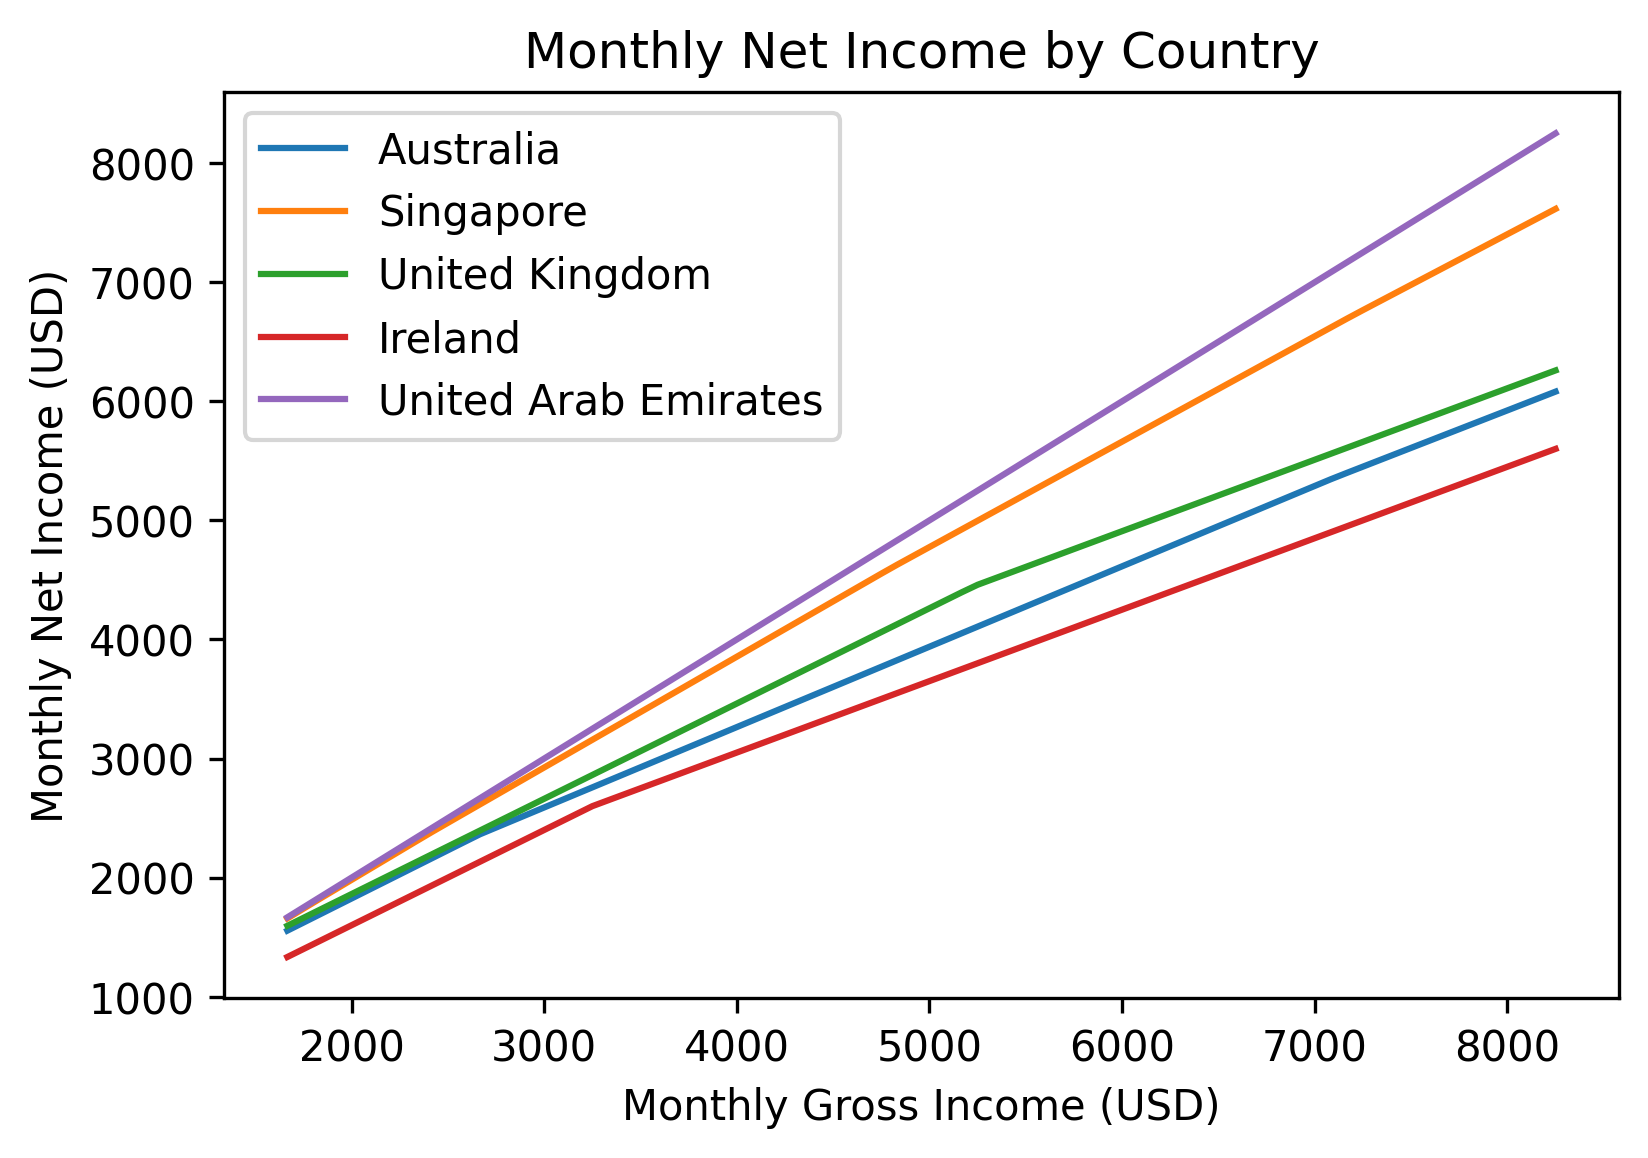

In [16]:
from matplotlib import pyplot as plt, rcParams
rcParams['figure.dpi'] = 300

from numpy import arange
usd_income = arange(20000, 100000, 1000)


for country in ["Australia", "Singapore", "United Kingdom", "Ireland", "United Arab Emirates"]:
    calculator = TaxCalculator(country)
    
    usd_income_after_tax = calculator.tax_on_usd_vector(usd_income)
        
    plt.plot(usd_income/12, (usd_income-usd_income_after_tax)/12, label=country)

plt.xlabel("Monthly Gross Income (USD)")
plt.ylabel("Monthly Net Income (USD)")
plt.title("Monthly Net Income by Country")
plt.legend()
plt.savefig("middle-high-incomes")

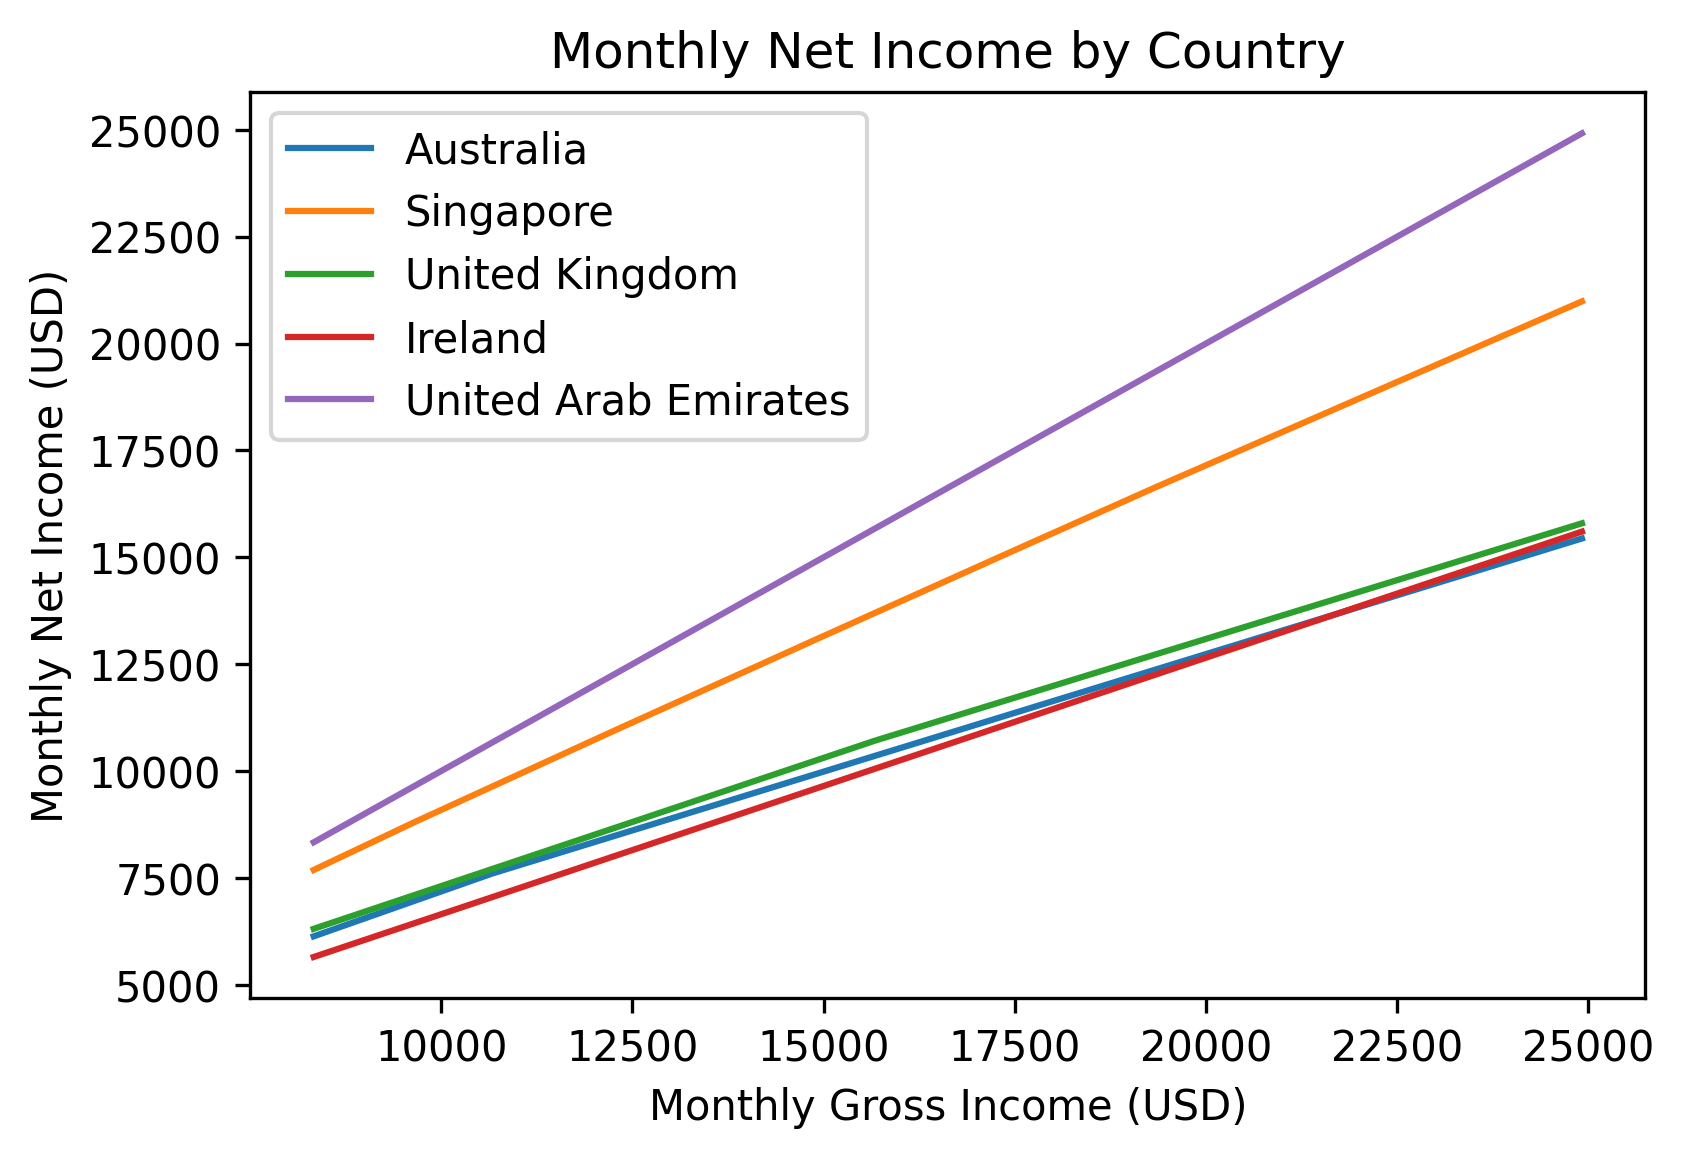

In [17]:

usd_income = arange(100000, 300000, 1000)


for country in ["Australia", "Singapore", "United Kingdom", "Ireland", "United Arab Emirates"]:
    calculator = TaxCalculator(country)
    
    usd_income_after_tax = calculator.tax_on_usd_vector(usd_income)
        
    plt.plot(usd_income/12, (usd_income-usd_income_after_tax)/12, label=country)

plt.xlabel("Monthly Gross Income (USD)")
plt.ylabel("Monthly Net Income (USD)")
plt.title("Monthly Net Income by Country")
plt.legend()
plt.savefig("very-high-incomes")

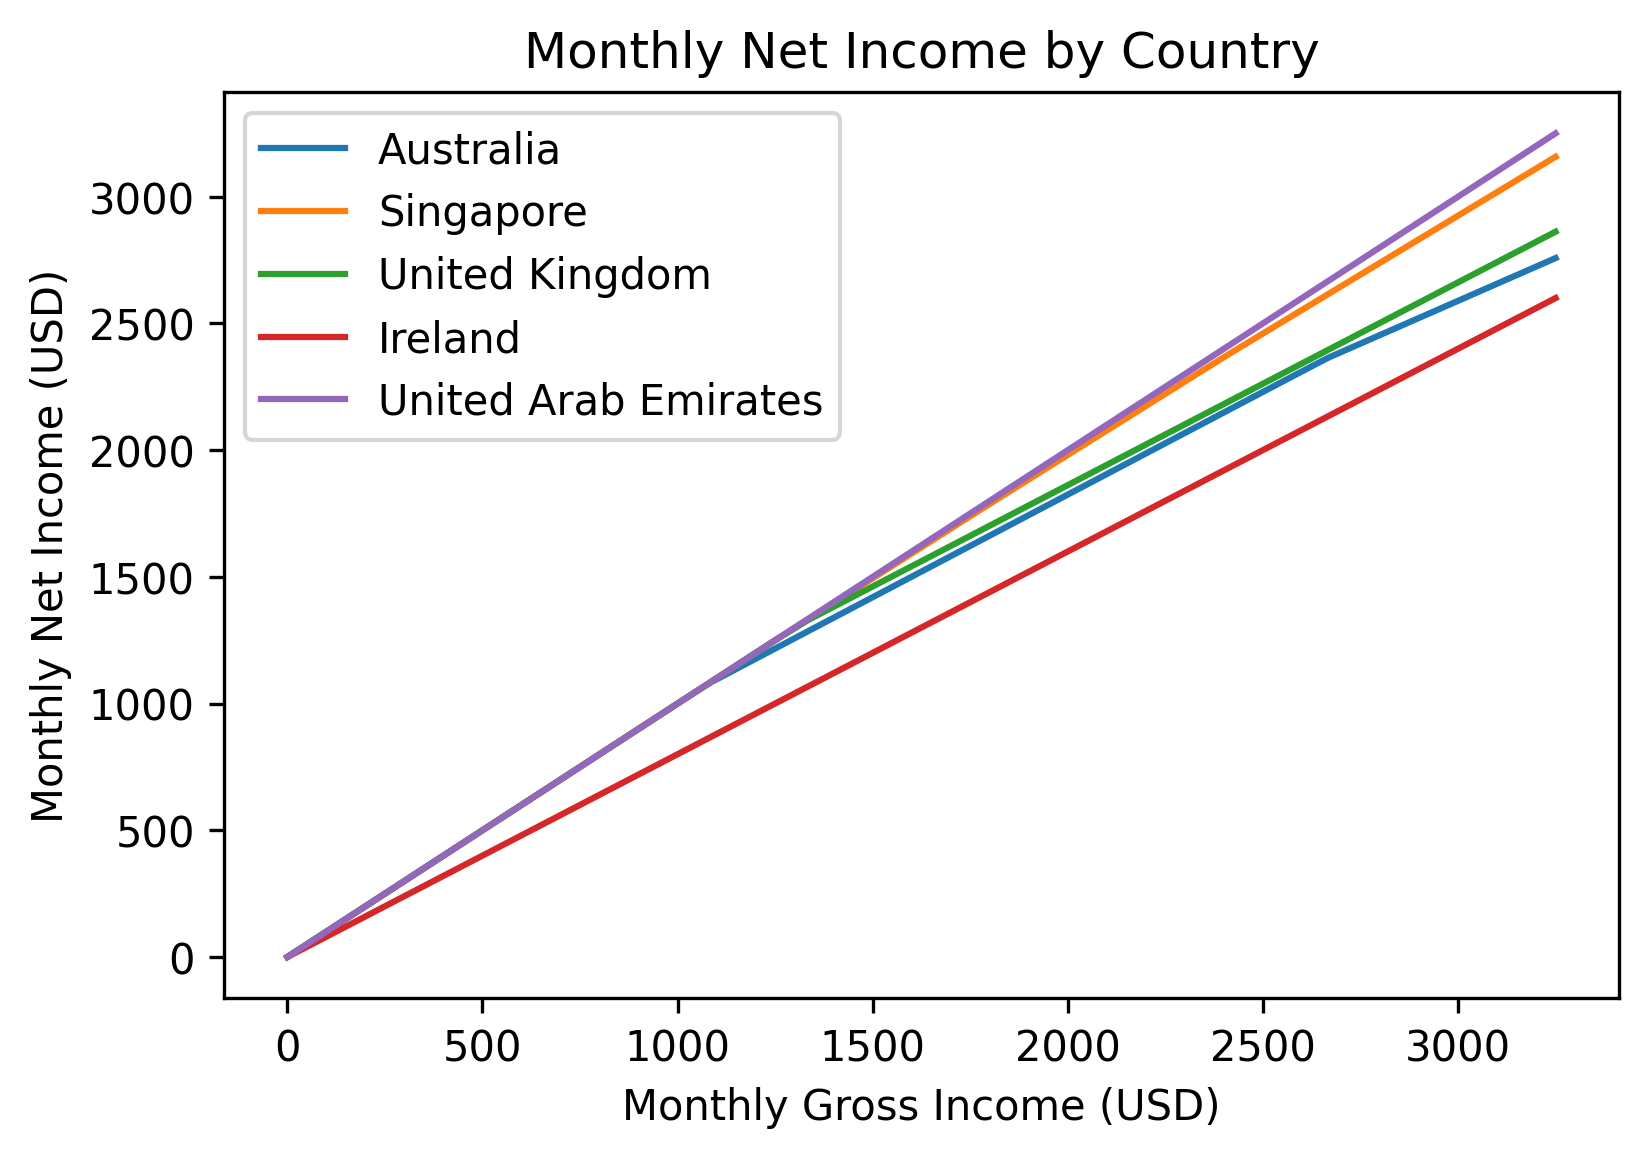

In [12]:
usd_income = arange(0, 40000, 1000)


for country in ["Australia", "Singapore", "United Kingdom", "Ireland", "United Arab Emirates"]:
    calculator = TaxCalculator(country)
    
    usd_income_after_tax = calculator.tax_on_usd_vector(usd_income)
        
    plt.plot(usd_income/12, (usd_income-usd_income_after_tax)/12, label=country)

plt.xlabel("Monthly Gross Income (USD)")
plt.ylabel("Monthly Net Income (USD)")
plt.title("Monthly Net Income by Country")
plt.legend()
plt.savefig("low-middle-incomes")